<a href="https://colab.research.google.com/github/roshanakhi/Roshan_Chowdary_INFO5502_SPRING2022/blob/main/lab_assignment_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The seventh Lab-assignment (03/31/2022, 50 points in total)

The purpose of this exercise is to build several regression models based on real-world datasets. 

### Question 1 (25 points) Build a regession model to predict the change in price of the stock overtime. It can either be linear regression or non-linear regression. You can download the dataset from here: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/portfolio_data.csv. The implementation of the LSTM on this same dataset was posted here as an reference: https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm/notebook

RMSE score is 75.9549436001661
R2 Score is 0.9783453724222465


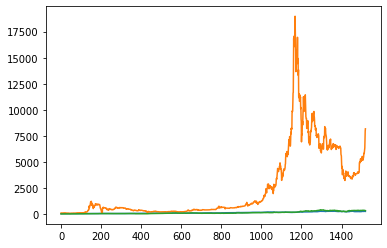

In [2]:
### You code here
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

azr=pd.read_csv('https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/portfolio_data.csv')

xyz = azr.drop(['Date', 'AMZN'], axis = 1)
yz = azr['AMZN']
plt.plot(xyz)
xyztrain,xyztest,yztrain,yztest = train_test_split(xyz, yz, test_size = 0.35, random_state = 0)

lm = LinearRegression()
lm.fit(xyztrain, yztrain)

yzpred = lm.predict(xyztest)
print("RMSE score is",np.sqrt(mean_squared_error(yztest, yzpred)))
print("R2 Score is", r2_score(yztest, yzpred))









In [3]:
pip install tensorflow

     |████████████████████████████████| 462 kB 8.1 MB/s 


In [4]:
pip install keras

In [6]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
mo = Sequential()
mo.add(LSTM(50, return_sequences=True, input_shape= (xyztrain.shape[1], 1)))
mo.add(LSTM(50, return_sequences=False))
mo.add(Dense(50))
mo.add(Dense(1))
mo.compile(optimizer='adam', loss='mean_squared_error')
mo.fit(xyztrain, yztrain, batch_size=1, epochs=100)

Epoch 1/100
988/988 [==============================] - 11s 5ms/step - loss: 326919.0938
Epoch 2/100
988/988 [==============================] - 4s 4ms/step - loss: 18903.5820
Epoch 3/100
988/988 [==============================] - 4s 5ms/step - loss: 8305.9189
Epoch 4/100
988/988 [==============================] - 4s 4ms/step - loss: 7337.6904
Epoch 5/100
988/988 [==============================] - 4s 4ms/step - loss: 7879.4722
Epoch 6/100
988/988 [==============================] - 4s 4ms/step - loss: 7336.3130
Epoch 7/100
988/988 [==============================] - 4s 4ms/step - loss: 7499.0190
Epoch 8/100
988/988 [==============================] - 4s 4ms/step - loss: 7343.0654
Epoch 9/100
988/988 [==============================] - 4s 4ms/step - loss: 6687.6709
Epoch 10/100
988/988 [==============================] - 6s 6ms/step - loss: 7166.6909
Epoch 11/100
988/988 [==============================] - 4s 4ms/step - loss: 7515.8140
Epoch 12/100
988/988 [==============================] - 4s 

In [ ]:
import pandas_ta
a.ta.ema(close='BTC', length=10, append=True)

ModuleNotFoundError: ignored

### Question 2 (25 points) The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets. Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset. The dataset can be downloaded here: https://github.com/unt-iialab/info5502-spring2022/tree/main/datasets/Twitter%20Sentiment%20Analysis. Please build a logistic regression model for the classification, evaluation metrics include accuracy, precision, recall, and F-1 score need to be reported. 

In [ ]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline
tr = pd.read_csv('/content/train 2.csv')
tst = pd.read_csv('/content/test.csv')
tr.head()
cz = tr.append(tst, ignore_index = True)
tr.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt
cz['tidy_tweet'] = np.vectorize(remove_pattern)(cz['tweet'], '@[\w]*')
cz['tidy_tweet'] = cz['tidy_tweet'].str.replace('[^a-zA-Z#]+',' ')
cz['tidy_tweet'] = cz['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))
tokenized_tweet = cz['tidy_tweet'].apply(lambda x: x.split())
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
cz['tidy_tweet']  = tokenized_tweet
all_words = ' '.join([text for text in cz['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

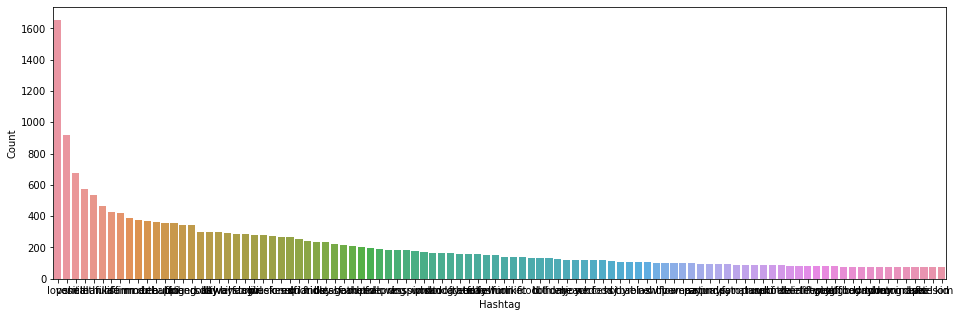

In [ ]:
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)
    return hashtags
HT_regular = hashtag_extract(cz['tidy_tweet'][cz['label'] == 0])
HT_negative = hashtag_extract(cz['tidy_tweet'][cz['label'] == 1])
HT_regular = sum(HT_regular, [])
HT_negative = sum(HT_negative, [])
azr = nltk.FreqDist(HT_regular)
dps = pd.DataFrame({'Hashtag': list(azr.keys()),
                  'Count' : list(azr.values())})
dps = dps.nlargest(columns = 'Count', n = 100)
plt.figure(figsize = (16,5))
azrx = sns.barplot(data =dps, x = 'Hashtag', y = 'Count')
plt.show()

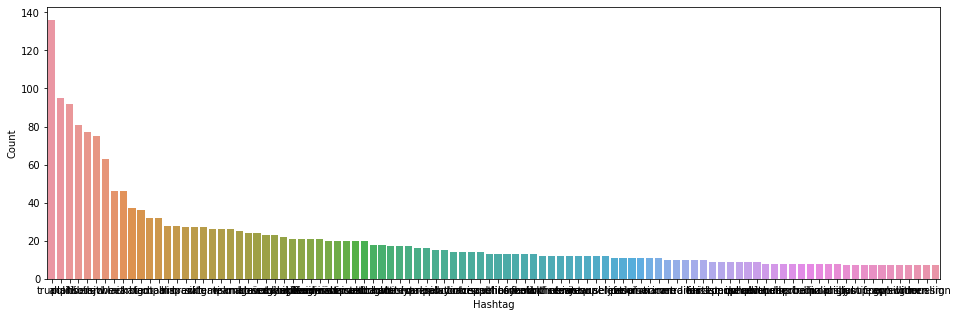

In [ ]:
#Racist Tweet

azr = nltk.FreqDist(HT_negative)
dps = pd.DataFrame({'Hashtag': list(azr.keys()),
                  'Count' : list(azr.values())})

dps = dps.nlargest(columns = 'Count', n = 100)

plt.figure(figsize = (16,5))
azrx = sns.barplot(data =dps, x = 'Hashtag', y = 'Count')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.99, min_df=6, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(cz['tidy_tweet'])
len(bow_vectorizer.get_feature_names())
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.99, min_df=6, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(cz['tidy_tweet'])
tr.shape
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
tr_bow = bow[:31962,:]
tst_bow = bow[31962:,:]
xtr_bow, xvalid_bow, ytr, yvalid = train_test_split(tr_bow, tr['label'], test_size = 0.5)
lr = LogisticRegression()
lr.fit(xtr_bow, ytr)
pr = lr.predict_proba(xvalid_bow)
pre_int = pr[:,1] >= 0.5
pre_int = pre_int.astype(np.int)
f1_score(yvalid, pre_int)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


0.4796104686548996